In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('cancer.csv')
df.head(150)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,869476,B,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,...,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360,NaN
146,869691,M,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,...,26.38,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,NaN
147,86973701,B,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,...,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218,NaN
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,...,19.85,108.60,766.9,0.13160,0.2735,0.3103,0.15990,0.2691,0.07683,NaN


In [5]:
df.shape
# rows = 569, cols=33

(569, 33)

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
numerical_columns = ['','','','','','','','','','','','','','','','','','','']
df[numerical_columns].describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.254265,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.157336,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.027290,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.147200,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.211900,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.339100,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.058000,0.663800,0.207500


In [11]:
numerical_columns = ['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']
df1 = df[numerical_columns]
[ df1[i].sort_values() for i in df1.columns ]

[101     6.981
 539     7.691
 538     7.729
 568     7.760
 46      8.196
         ...  
 82     25.220
 352    25.730
 180    27.220
 461    27.420
 212    28.110
 Name: radius_mean, Length: 569, dtype: float64,
 166     9.71
 0      10.38
 313    10.72
 120    10.82
 123    10.89
        ...  
 265    31.12
 219    32.47
 259    33.56
 232    33.81
 239    39.28
 Name: texture_mean, Length: 569, dtype: float64,
 568    0.05263
 178    0.06251
 270    0.06429
 298    0.06576
 450    0.06613
         ...   
 520    0.13710
 105    0.13980
 3      0.14250
 122    0.14470
 504    0.16340
 Name: smoothness_mean, Length: 569, dtype: float64,
 178    0.01938
 192    0.02344
 360    0.02650
 270    0.02675
 307    0.03116
         ...   
 181    0.28320
 3      0.28390
 122    0.28670
 258    0.31140
 78     0.34540
 Name: compactness_mean, Length: 569, dtype: float64,
 568    0.0000
 314    0.0000
 538    0.0000
 101    0.0000
 192    0.0000
         ...  
 461    0.3635
 78     0.3754
 15

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)  # axis=1 => columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
np.array(df)

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [33]:
df['diagnosis'] = np.where(df['diagnosis']=='M',1,0)

In [34]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
numerical_cols = ['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
python src/components/data_ingestion.py

In [13]:
df[numerical_cols]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Univariate Analysis

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

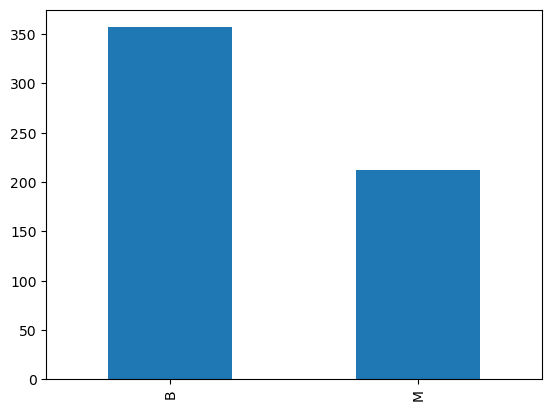

In [10]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.show()

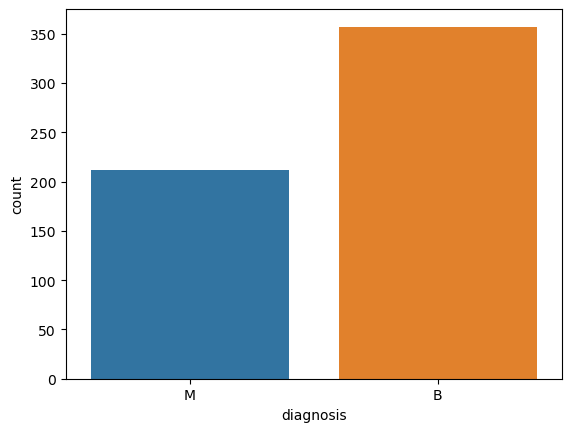

In [11]:
sns.countplot(data=df,x='diagnosis')
plt.show()

In [1]:
numerical_columns = ['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']
df[numerical_columns]

NameError: name 'df' is not defined

In [13]:
# num_cols = df.iloc[:,1:]
# r1 = df[df.dtypes()!='object']
# r1.columns
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
df1 = df.copy()

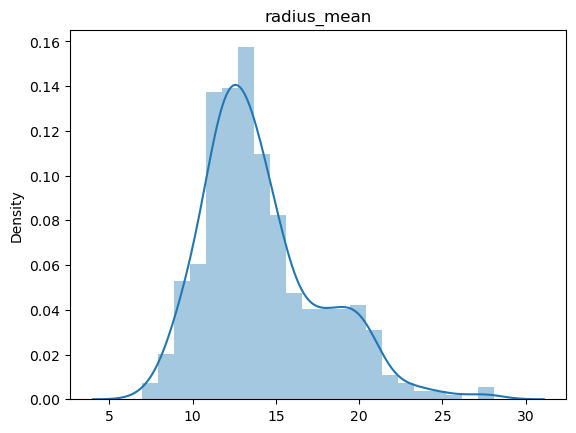

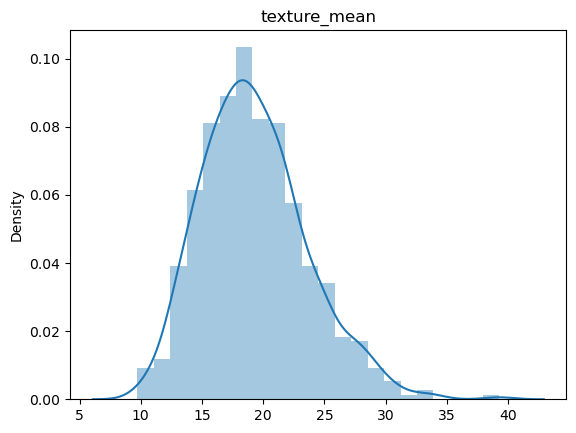

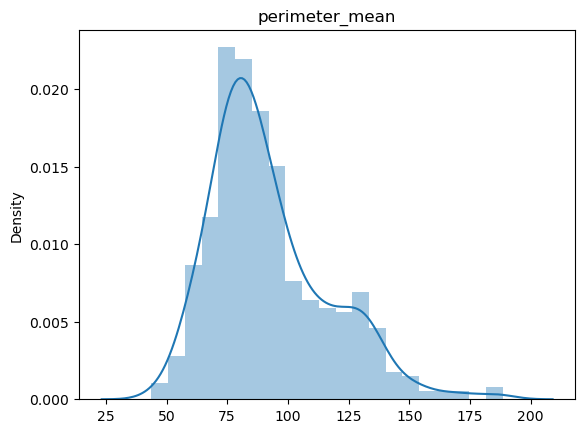

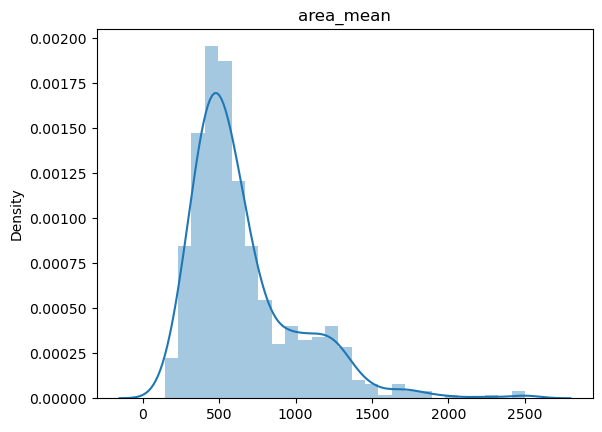

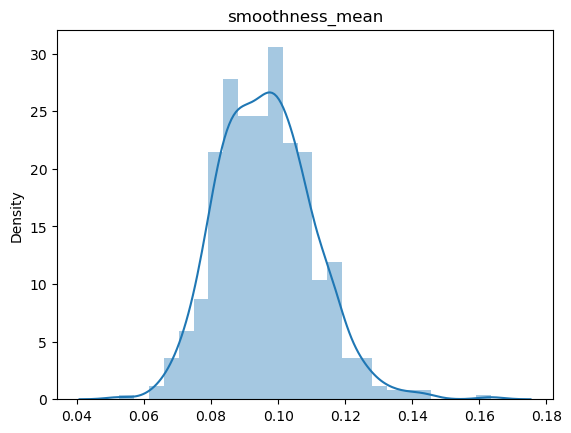

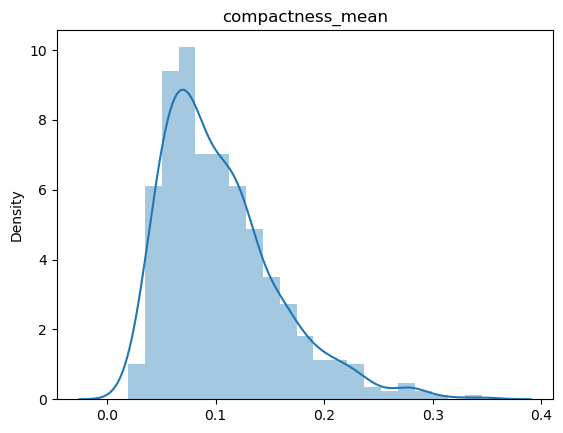

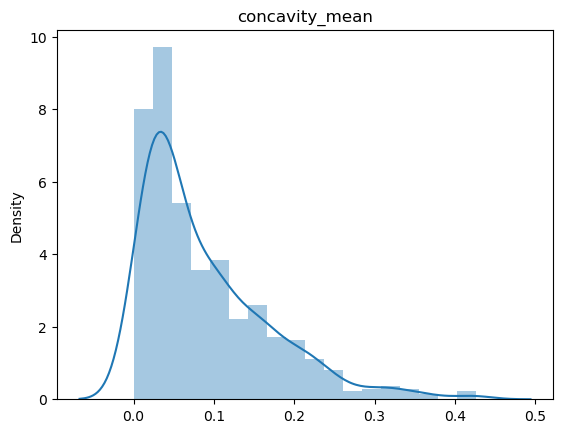

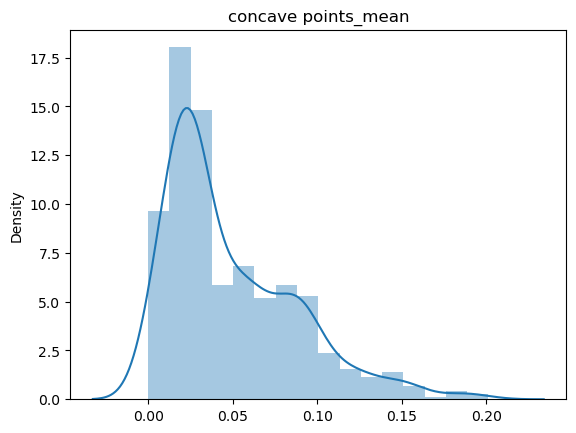

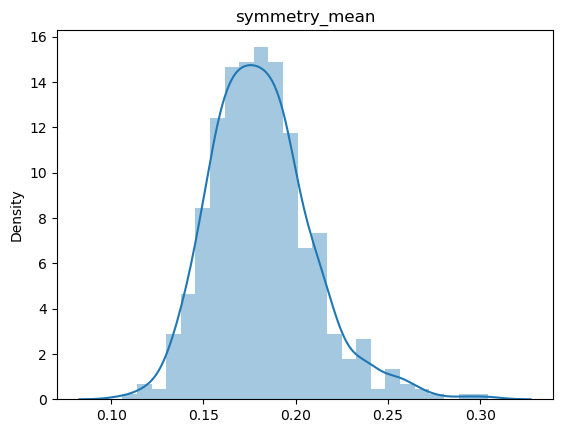

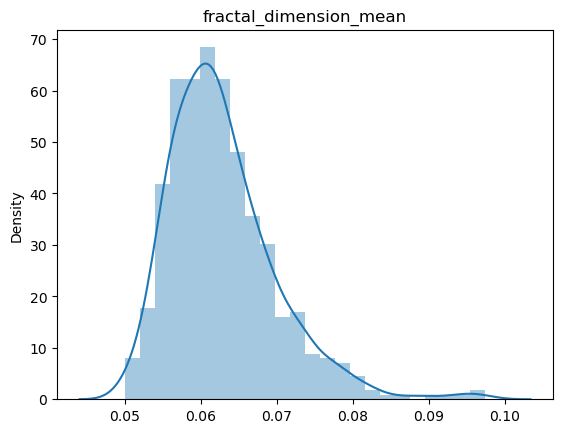

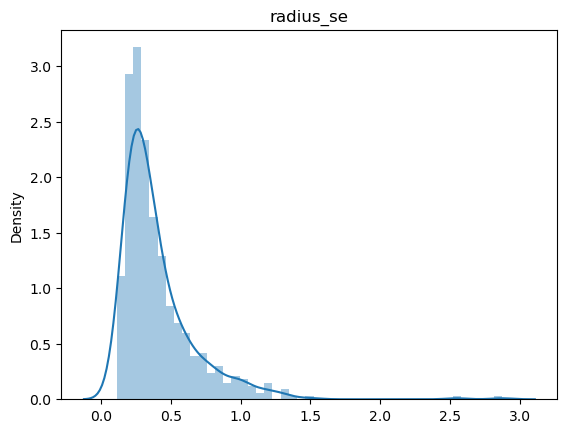

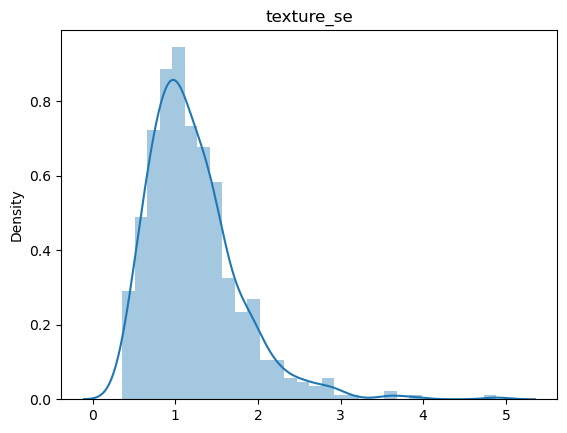

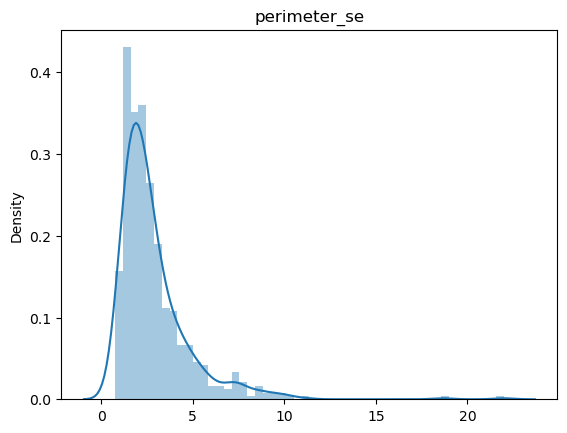

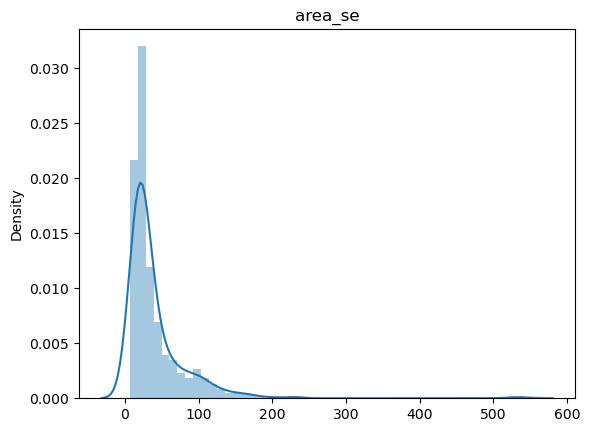

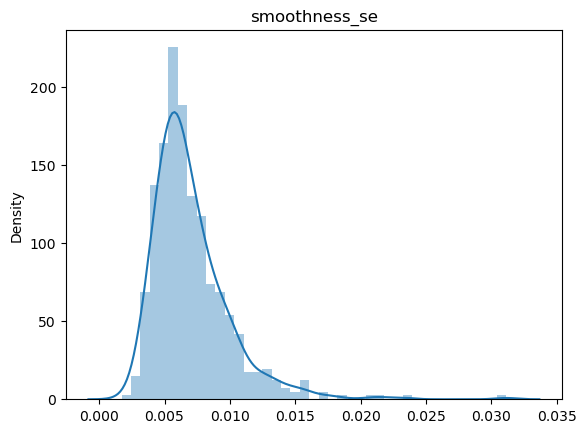

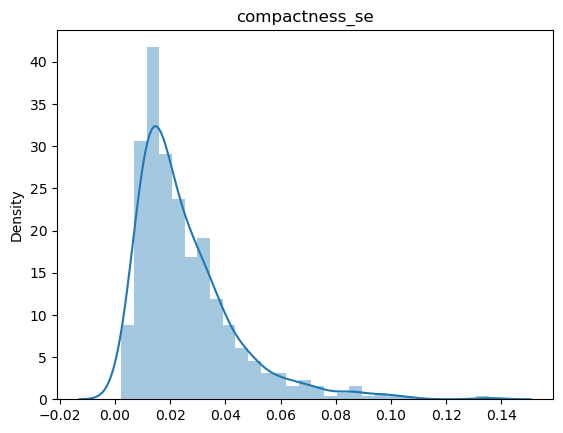

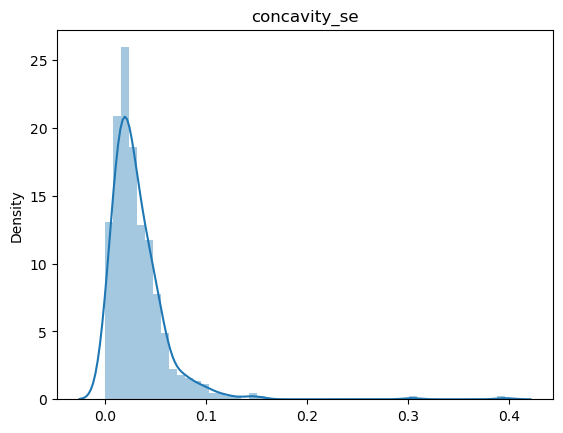

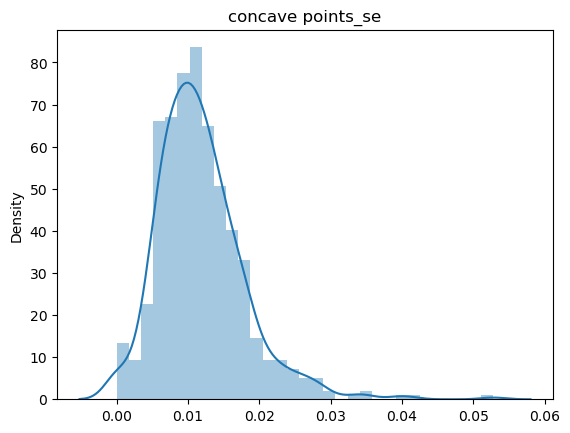

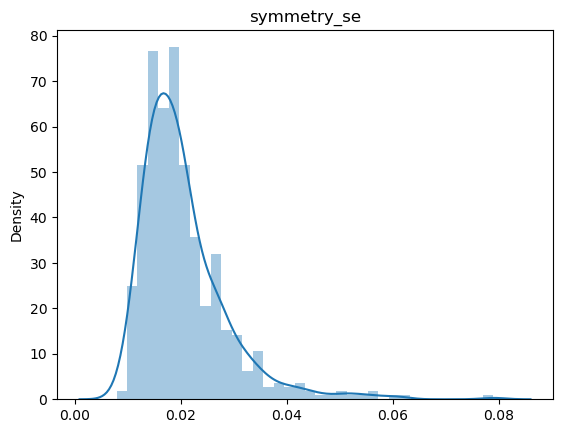

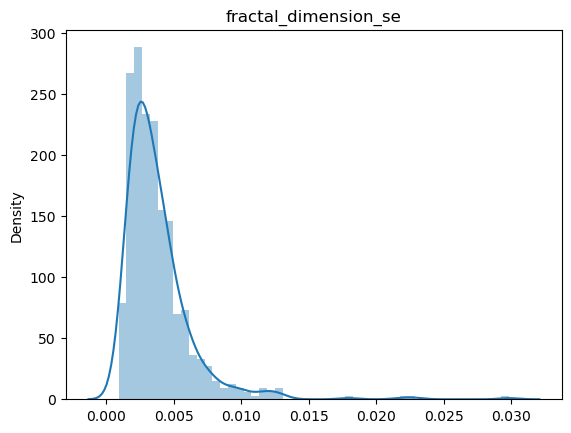

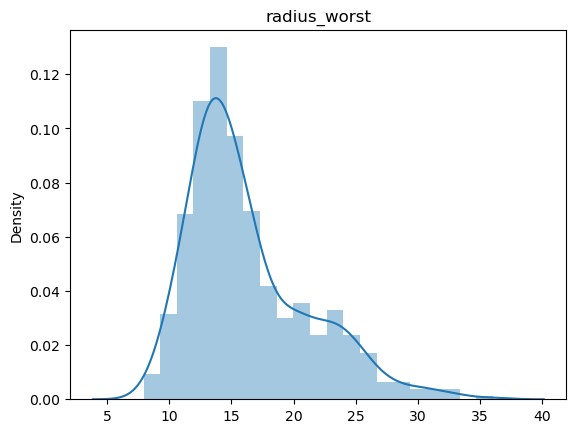

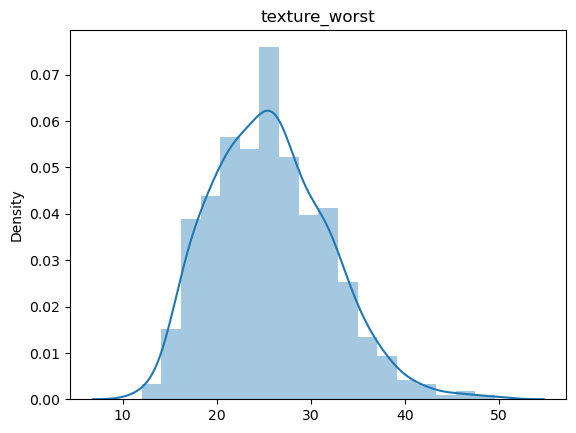

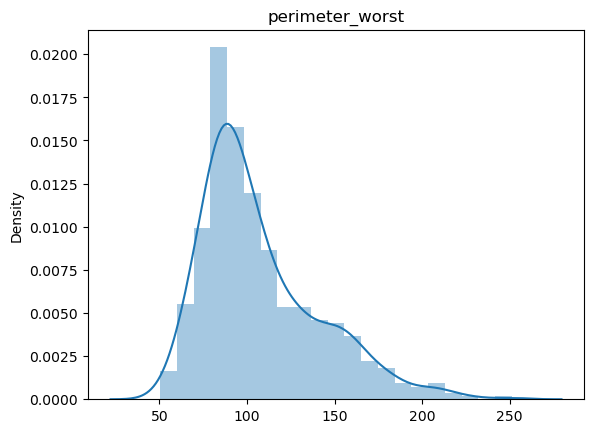

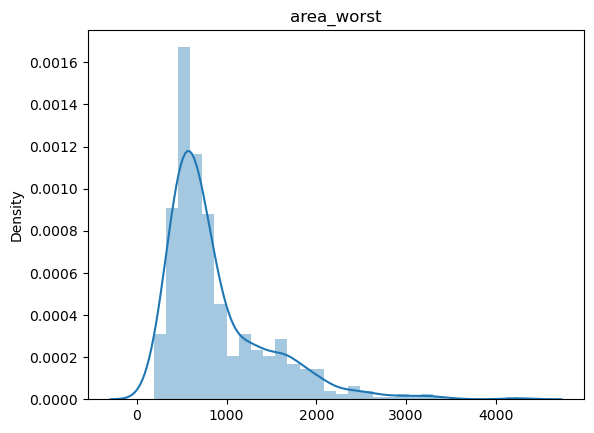

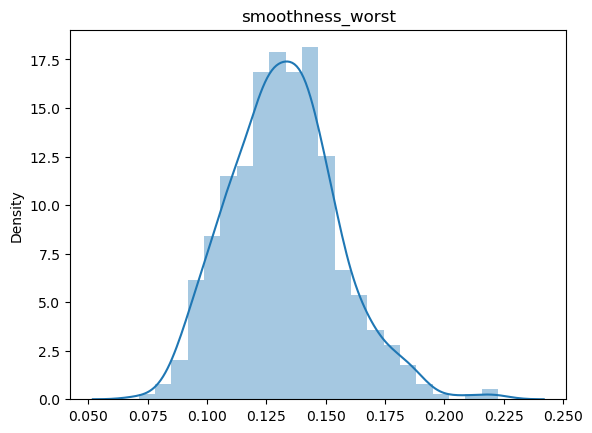

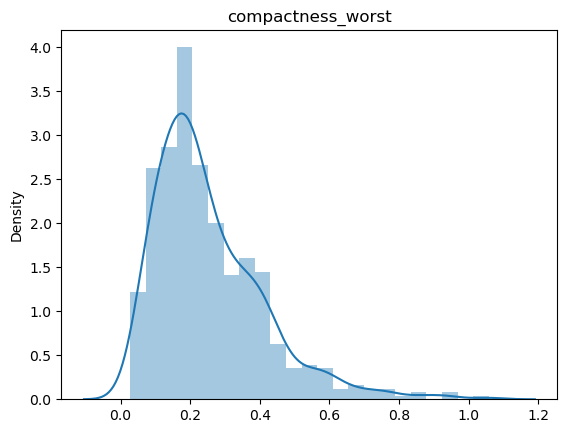

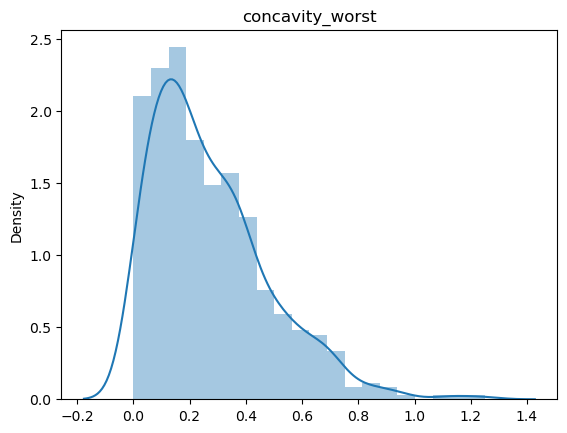

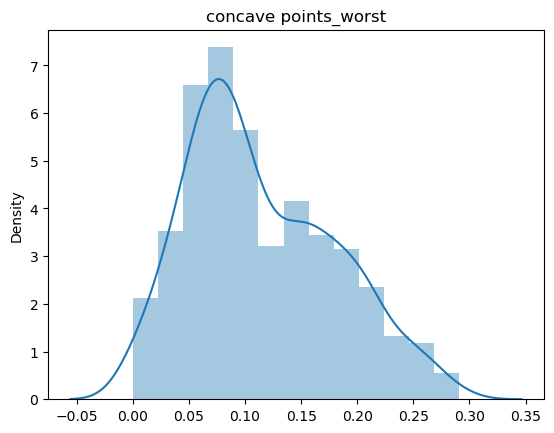

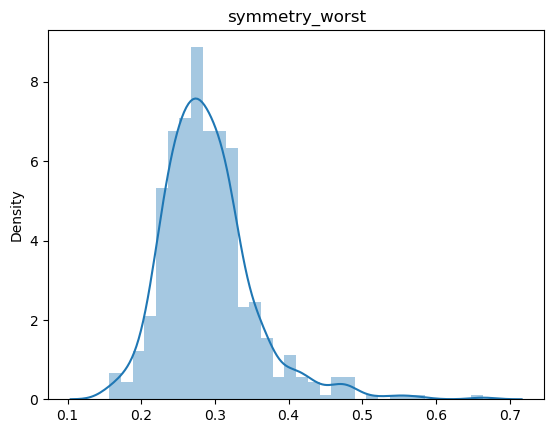

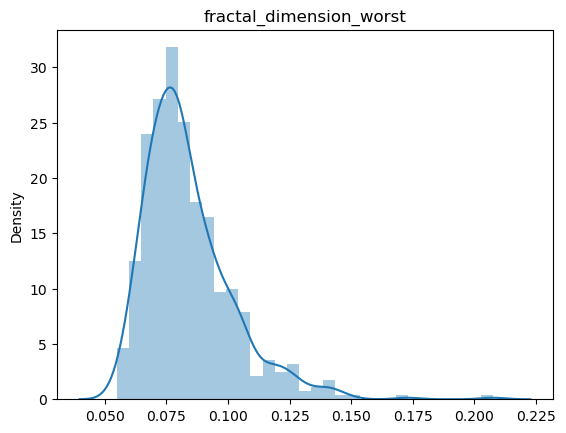

In [15]:
for i in num_cols:          # num_cols contains only col_names
    plt.title(i)
    sns.distplot(x=df[i])   # sns.boxplot()  sns.violinplot()
    plt.show()

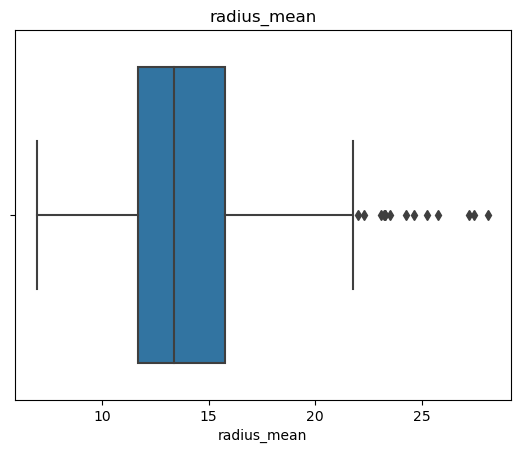

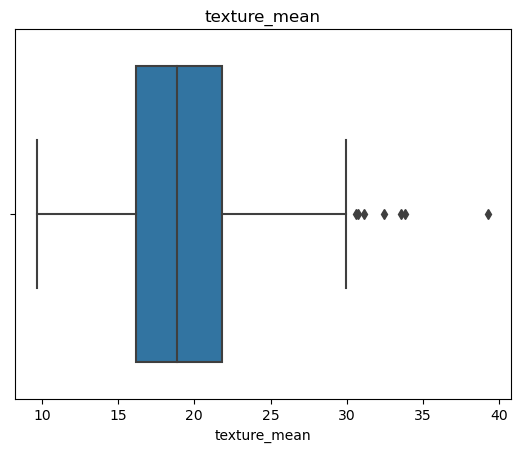

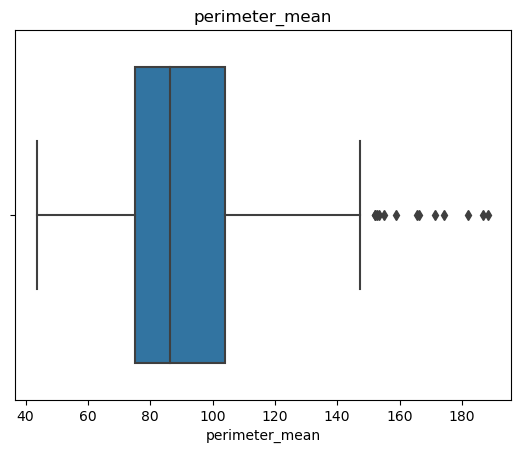

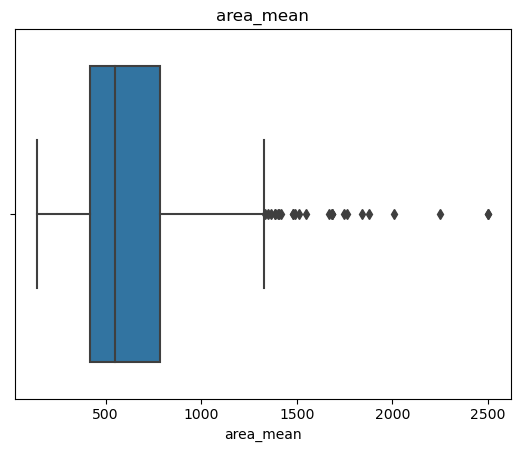

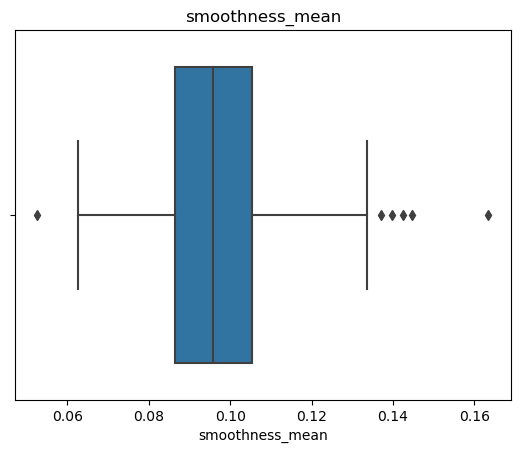

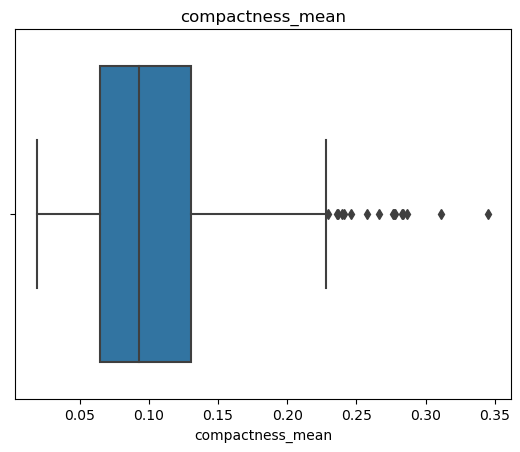

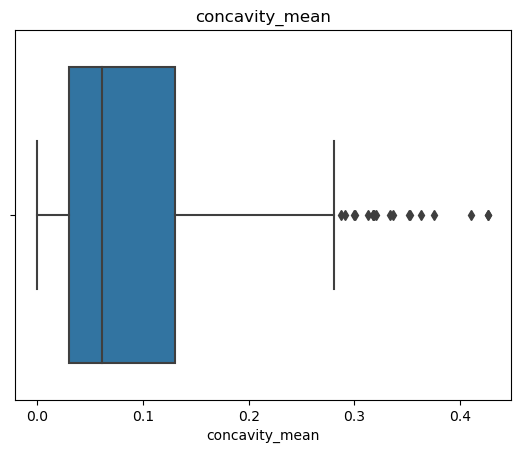

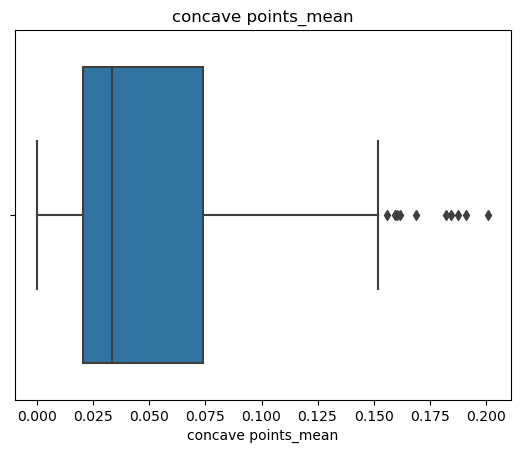

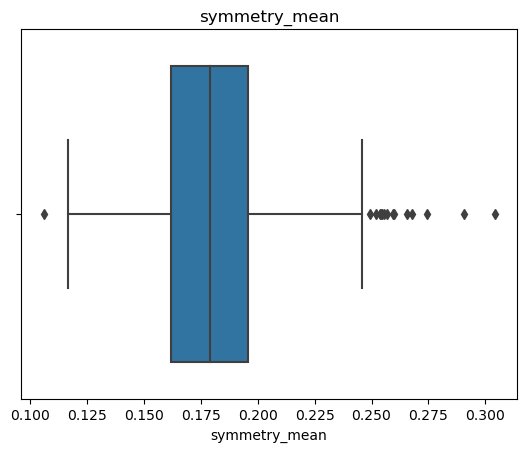

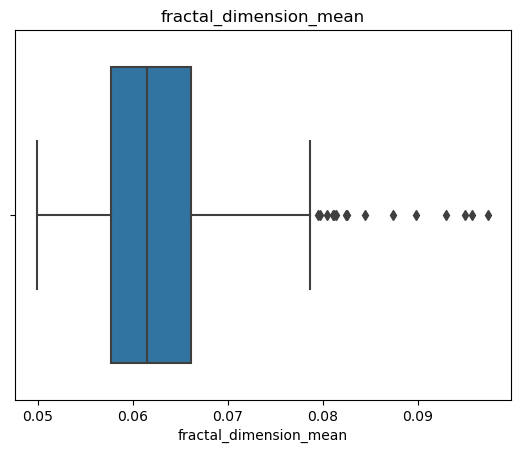

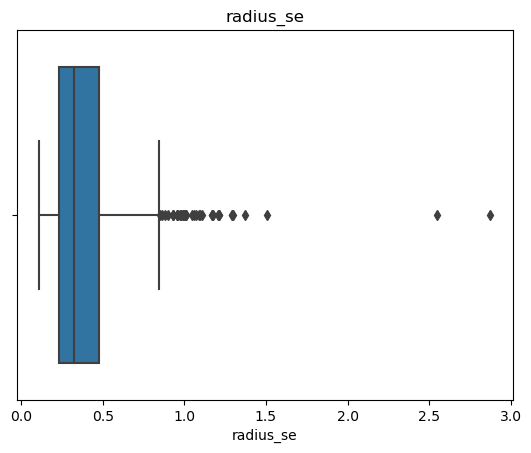

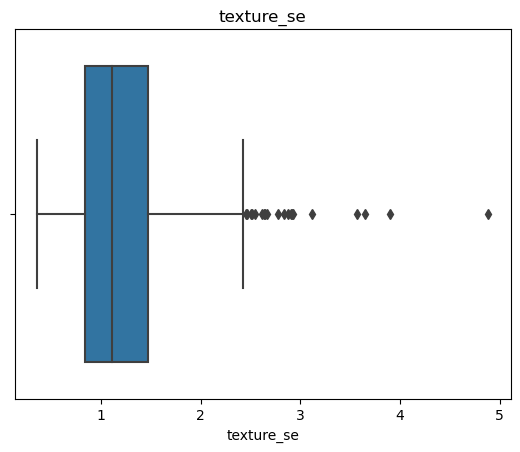

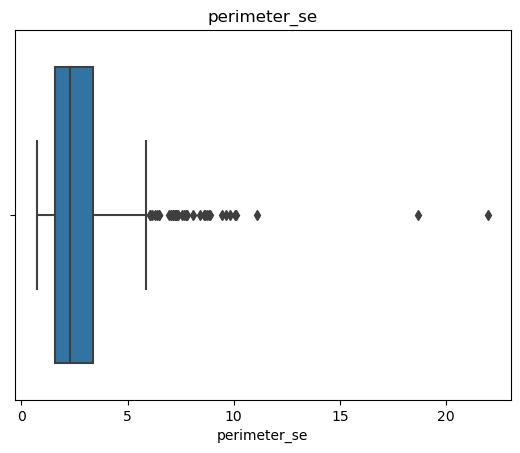

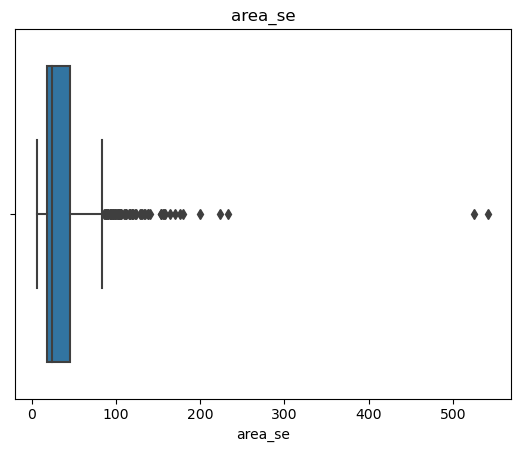

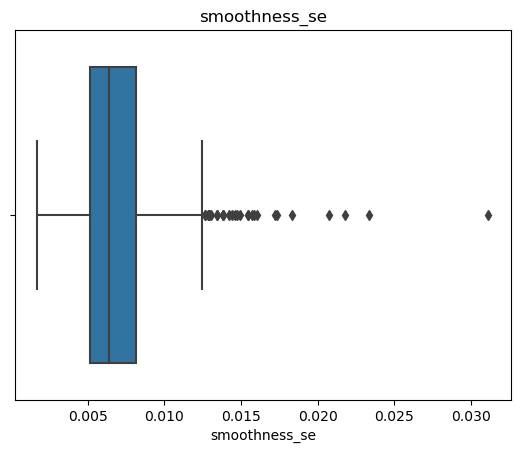

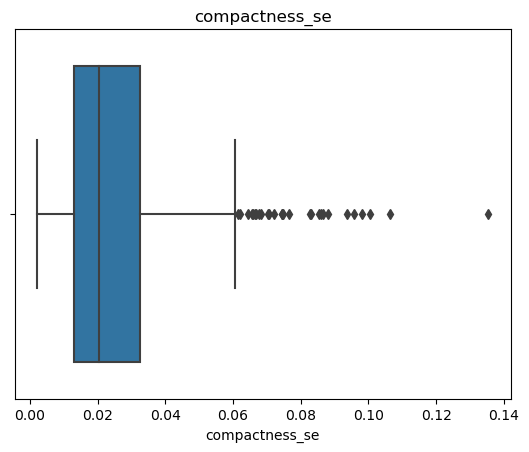

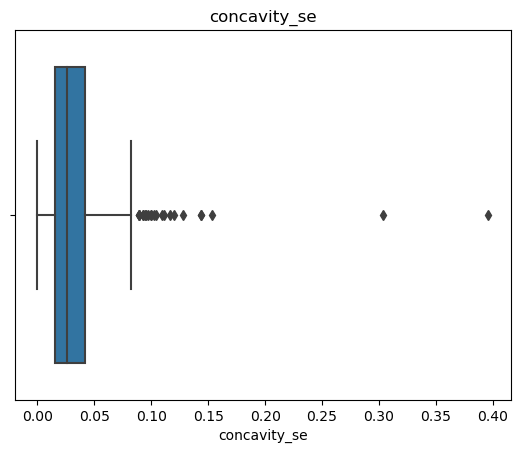

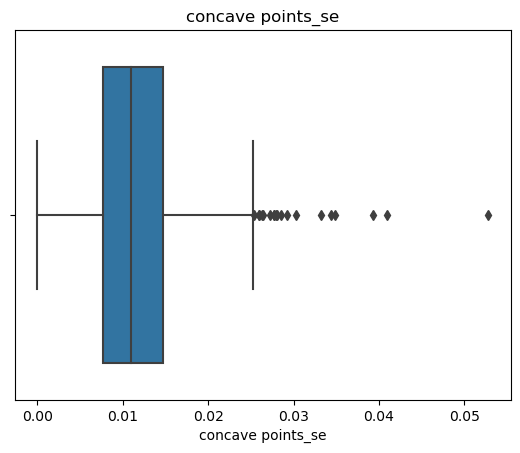

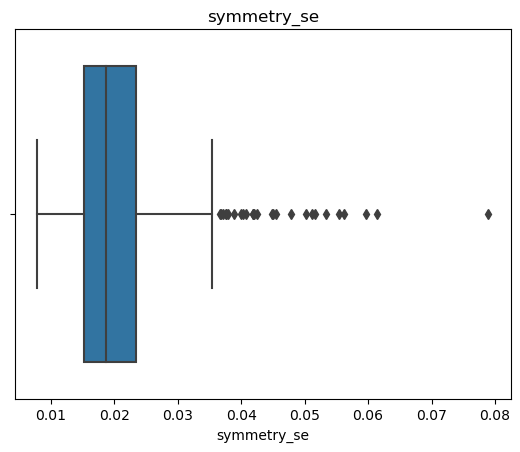

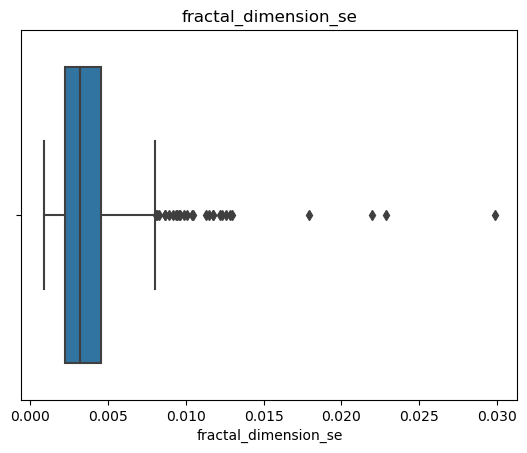

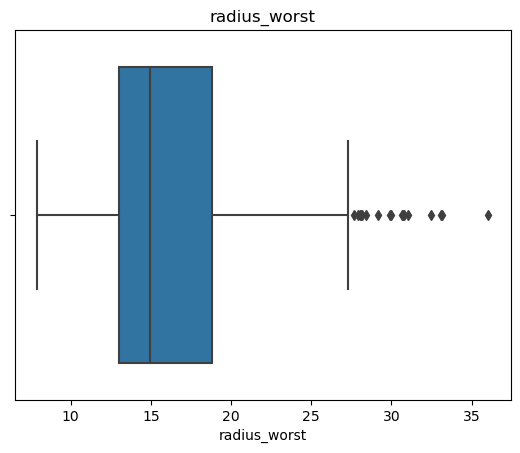

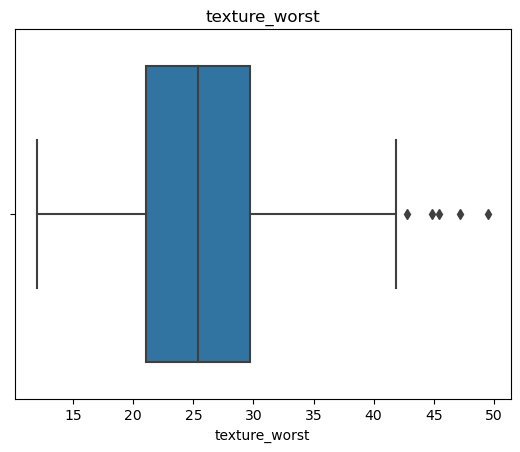

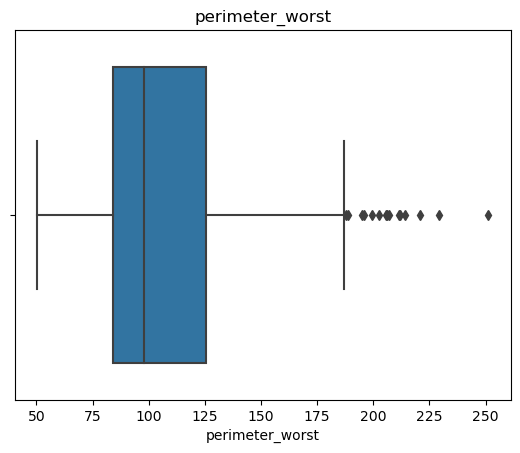

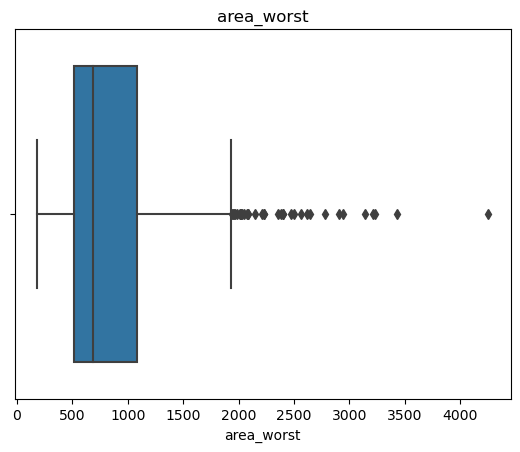

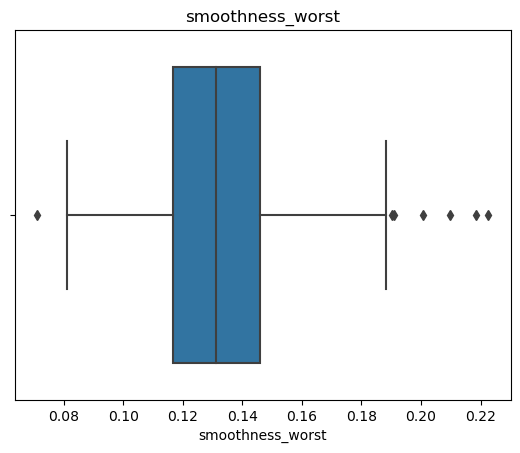

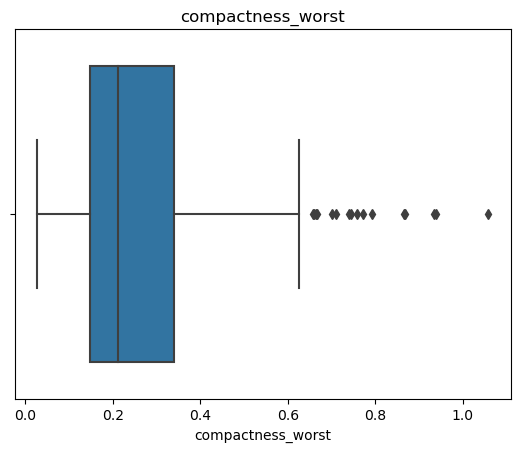

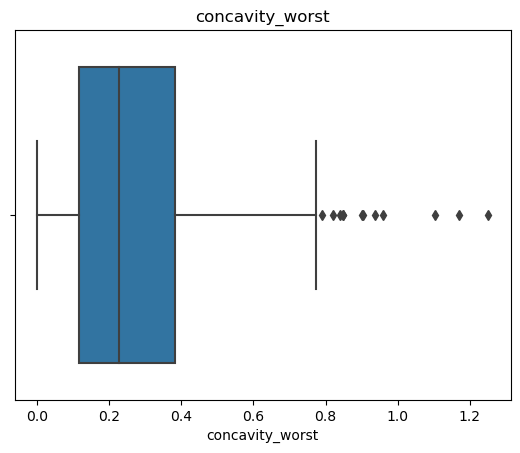

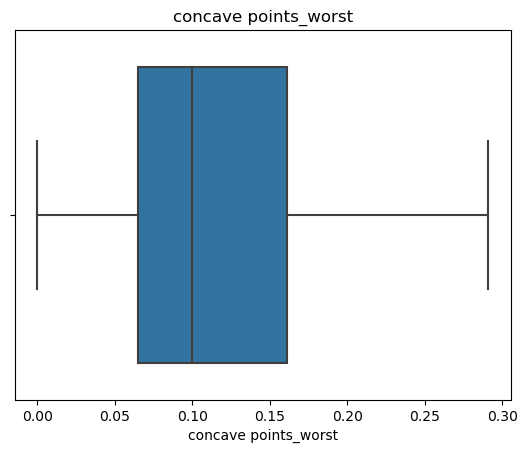

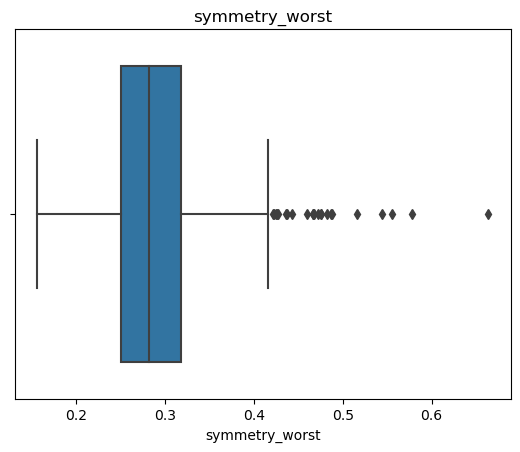

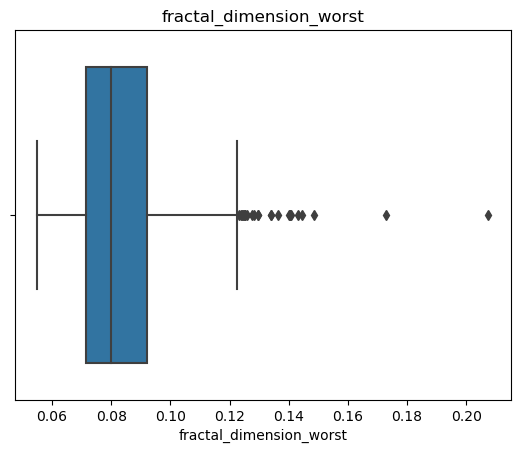

In [16]:
for i in num_cols:          # num_cols contains only col_names
    plt.title(i)
    sns.boxplot(x=df[i])   # sns.boxplot()  sns.violinplot()
    plt.show()

#### Outlier Treatment

In [17]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981000,8.458360,8.728880,9.029520,9.529200,13.370000,20.576000,21.552400,22.794800,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,10.930400,12.188000,12.711200,13.088000,18.840000,27.150000,28.209600,29.315600,30.652000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,53.827600,55.475200,58.798800,60.496000,86.240000,135.820000,142.988000,152.100000,165.724000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,215.664000,232.124000,246.396000,275.780000,551.100000,1309.800000,1418.520000,1625.360000,1786.600000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.068654,0.070126,0.073512,0.075042,0.095870,0.118780,0.123696,0.126724,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.033351,0.035884,0.037663,0.040660,0.092630,0.208700,0.227452,0.240688,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.000000,0.000000,0.001489,0.004983,0.061540,0.243020,0.286856,0.317528,0.351688,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.000000,0.000000,0.003130,0.005621,0.033500,0.125740,0.146664,0.150292,0.164208,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.129508,0.134936,0.137308,0.141500,0.179200,0.230720,0.239796,0.253188,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.051504,0.052473,0.053072,0.053926,0.061540,0.076090,0.078173,0.080831,0.085438,0.09744


In [18]:
# min df['a'] = np.where(df['a']<687,687,df['a'])
# min df['a'] = np.where(df['a']<687,687,df['a'])

In [19]:
def out_treat(x):
    x = x.clip(upper = x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [20]:
num_cols = [i for i in df.columns if df[i].dtypes!='object']
print(num_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [21]:
df[num_cols] = df[num_cols].apply(out_treat)
python src/components/data_ingestion.py
python src/components/data_ingestion.py

In [ ]:
['radius_worst', 'texture_worst', 'concavity_worst', 'perimeter_mean', 'area_worst', 'concave points_worst', 'concave points_mean', 'perimeter_se', 'area_mean', 'area_se', 'perimeter_worst']

In [ ]:
['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']

In [22]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.06,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,6%,50%,95%,97%,98%,99%,max
radius_mean,569.0,14.060960,3.305143,8.458360,8.534955,8.728880,9.029520,9.529200,9.685960,13.370000,20.576000,21.545104,21.552400,21.552400,21.552400
texture_mean,569.0,19.217180,4.080940,10.930400,10.936928,12.188000,12.711200,13.088000,13.211600,18.840000,27.150000,28.209216,28.209600,28.209600,28.209600
perimeter_mean,569.0,91.474727,22.666126,53.827600,54.006032,55.475200,58.798800,60.496000,61.490800,86.240000,135.820000,142.976480,142.988000,142.988000,142.988000
area_mean,569.0,643.662116,313.097571,215.664000,219.428480,232.124000,246.396000,275.780000,288.132000,551.100000,1309.800000,1418.059200,1418.520000,1418.520000,1418.520000
smoothness_mean,569.0,0.096135,0.013154,0.068654,0.068774,0.070126,0.073512,0.075042,0.076232,0.095870,0.118780,0.123692,0.123696,0.123696,0.123696
compactness_mean,569.0,0.103259,0.049189,0.033351,0.033745,0.035884,0.037663,0.040660,0.042374,0.092630,0.208700,0.227310,0.227452,0.227452,0.227452
concavity_mean,569.0,0.087077,0.074276,0.000000,0.000000,0.000000,0.001489,0.004983,0.007179,0.061540,0.243020,0.286622,0.286856,0.286856,0.286856
concave points_mean,569.0,0.048384,0.037173,0.000000,0.000000,0.000000,0.003130,0.005621,0.006446,0.033500,0.125740,0.146437,0.146664,0.146664,0.146664
symmetry_mean,569.0,0.180658,0.025409,0.129508,0.130183,0.134936,0.137308,0.141500,0.144248,0.179200,0.230720,0.239792,0.239796,0.239796,0.239796
fractal_dimension_mean,569.0,0.062599,0.006355,0.051504,0.051678,0.052473,0.053072,0.053926,0.054293,0.061540,0.076090,0.078166,0.078173,0.078173,0.078173


#### Bivariate Analysis

In [23]:
# Cat - cat
# cat(diagnosis) - num
# num - num - pairplot

In [24]:
print(num_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [25]:
df.groupby('diagnosis').agg({'compactness_se':['min','max','mean','var','std','count','sum'],
                            'area_se':['min','max'],'concavity_worst':['mean','var']})

compactness_se                                                \
                     min       max      mean       var       std count   
diagnosis                                                                
B               0.004705  0.070548  0.021054  0.000218  0.014765   357   
M               0.008422  0.070548  0.031472  0.000244  0.015629   212   

                      area_se          concavity_worst            
                sum       min      max            mean       var  
diagnosis                                                         
B          7.516241   8.51444   77.110        0.164291  0.016704  
M          6.671965  13.99000  134.728        0.440524  0.024644

In [26]:
# sns.pairplot(data = df)

#### Multicollinearity

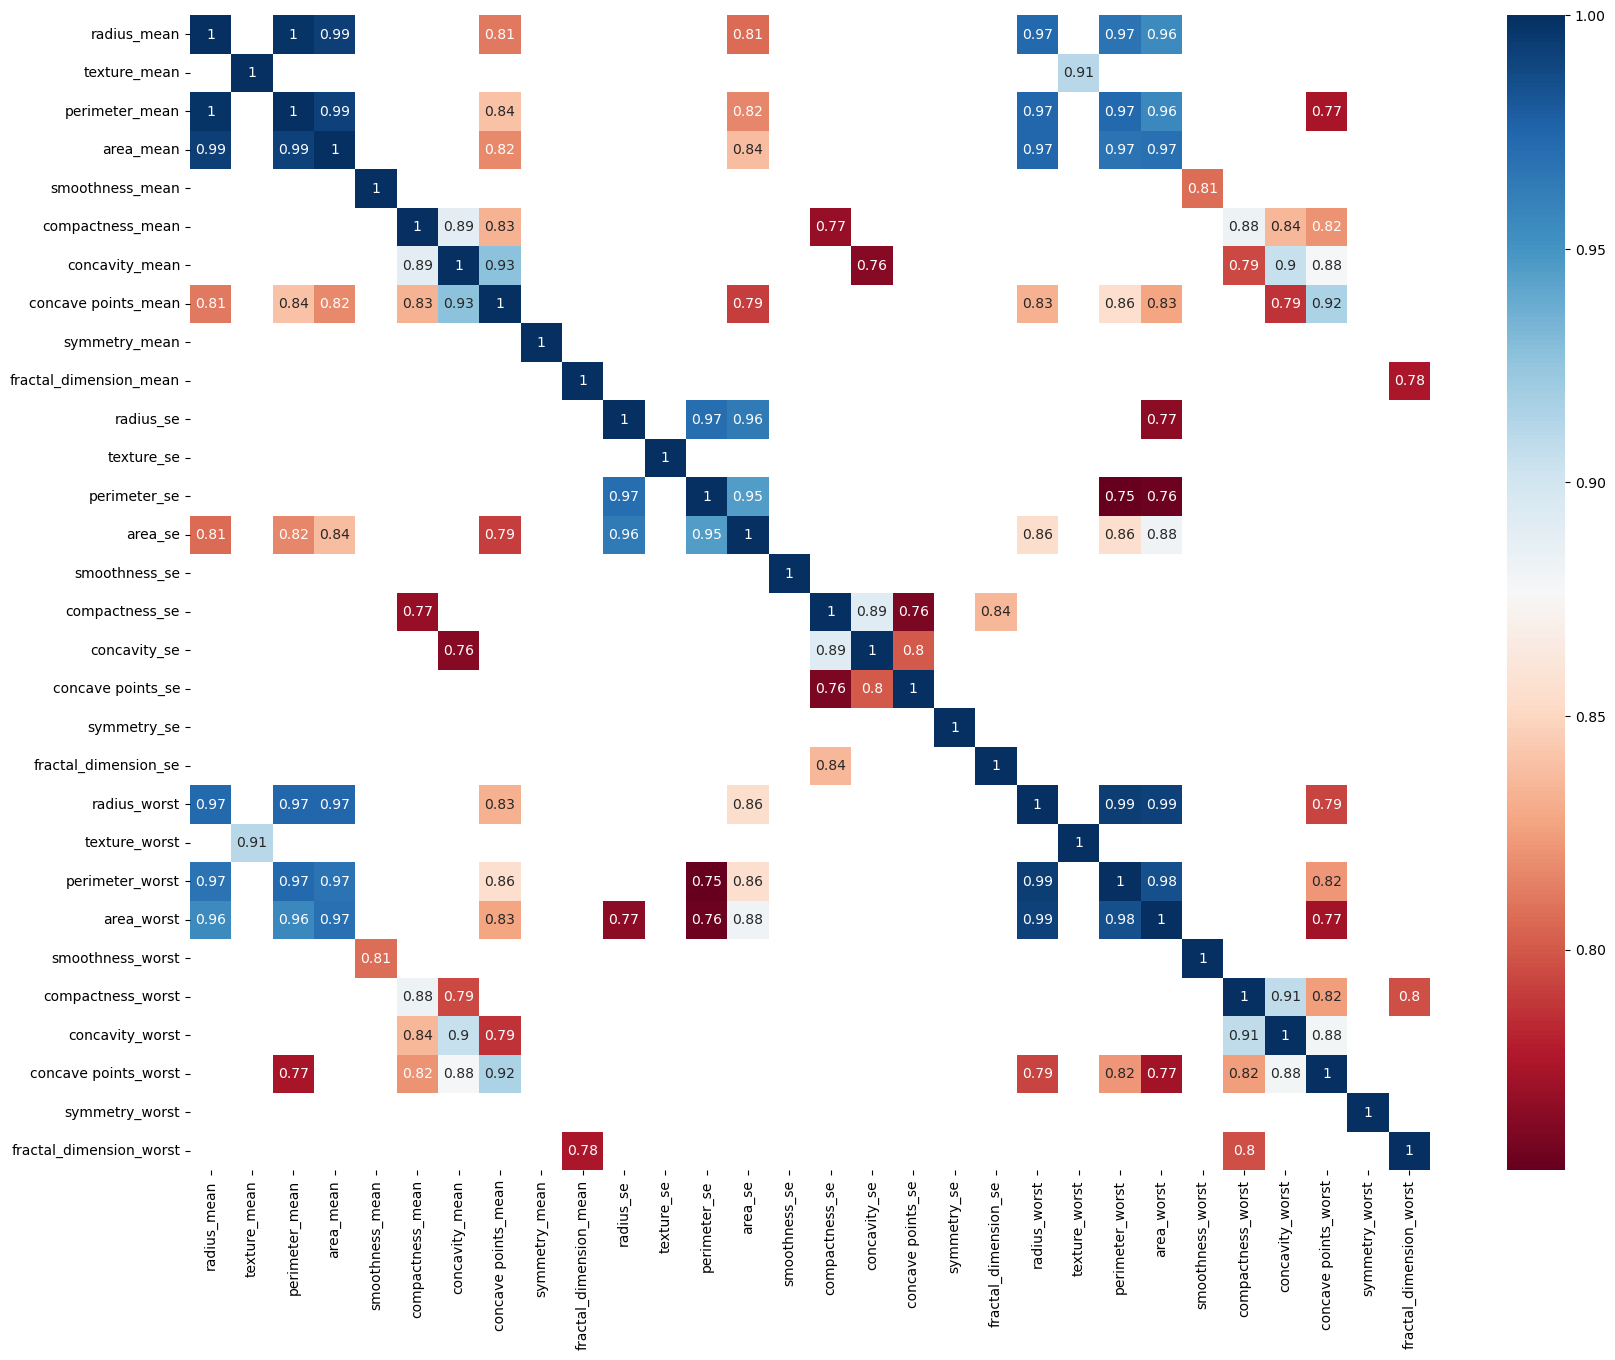

In [27]:
corr = df.corr()
corr = corr[abs(corr)>0.75]
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [28]:
corr = df.corr()

In [29]:
corr.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [30]:
corr.iloc[2,3]

0.9913666388120274

In [31]:
print(len(corr.columns))

30


In [32]:
corr.columns[1]

'texture_mean'

In [33]:
for i in range(0):
    print(i)

In [82]:
for i in range(1):
    for j in range(i):
        print(i,j)

In [66]:
for i in range(5):       # i=0,1,2,3,4
    for j in range(i):   # i=1,j=0, i=2,j=[0,1]
        print('i',i,'j',j)

i 1 j 0
i 2 j 0
i 2 j 1
i 3 j 0
i 3 j 1
i 3 j 2
i 4 j 0
i 4 j 1
i 4 j 2
i 4 j 3


In [35]:
def high_corr_feat(corr,thresh):
    res = []
    for i in range(len(corr.columns)): # i = 0,1,2..,29
        for j in range(i):             # i=0,j=0,  i=1,j=0
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    
feat_to_drop = high_corr_feat(corr,0.9)
print(feat_to_drop)

['radius_worst', 'texture_worst', 'concavity_worst', 'perimeter_mean', 'area_worst', 'concave points_worst', 'concave points_mean', 'perimeter_se', 'area_mean', 'area_se', 'perimeter_worst']


In [36]:
df.drop(feat_to_drop,inplace=True,axis=1)

In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df.shape
# rows = 569, cols=20

(569, 20)

#### Model Building

#### Select x and y 

In [40]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
print(x.shape)
print(y.shape)

(569, 19)
(569,)


#### Splitting data into train and test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 19)
(171, 19)
(398,)
(171,)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [46]:
# dt1 = DecisionTreeClassifier(max_depth=4,min_samples_split=20,criterion='entropy')  # decision stump

m1 = AdaBoostClassifier(n_estimators=70)  # depth of DT used = 1

In [47]:
model_metrics(m1,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.9766081871345029
Predictions ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B']
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171


#### Hyperparamter Tuning - GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'n_estimators':[30,40,50,55,60,70,80,90,100],
         'base_estimator':[DecisionTreeClassifier(max_depth=1),
                          DecisionTreeClassifier(max_depth=2,criterion='entropy'),
                          DecisionTreeClassifier(max_depth=3)]}
params

{'n_estimators': [30, 40, 50, 55, 60, 70, 80, 90, 100],
 'base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(criterion='entropy', max_depth=2),
  DecisionTreeClassifier(max_depth=3)]}

In [51]:
ada = AdaBoostClassifier()
gs1 = GridSearchCV(estimator=ada, param_grid=params,cv=10,scoring='accuracy')
gs1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(criterion='entropy',
                                                                   max_depth=2),
                                            DecisionTreeClassifier(max_depth=3)],
                         'n_estimators': [30, 40, 50, 55, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [52]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'base_estimator': DecisionTreeClassifier(max_depth=3), 'n_estimators': 80}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=80)
0.9674999999999999


In [53]:
dt2 = DecisionTreeClassifier(max_depth=3,criterion='gini')  # decision stump
m2 = AdaBoostClassifier(n_estimators=80)

In [54]:
model_metrics(m2,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.9766081871345029
Predictions ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B']
[[107   1]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171


#### XGBoost

In [168]:
# !pip install xgboost

In [57]:
from xgboost import XGBClassifier

In [58]:
set(y_train)

{'B', 'M'}

In [60]:
y_train1 = np.where(y_train=='B',0,1)
y_test1 = np.where(y_test=='B',0,1)

In [61]:
y_train1[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [63]:
m1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  n_estimators=100,max_depth=4,reg_lambda=0.2,eta=0.3,
                  gamma=0.5, use_label_encoder=False,random_state=30)

model_metrics(m1,x_train,x_test,y_train1,y_test1)

Training score 1.0
Testing score 0.9707602339181286
Predictions [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[[105   3]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

